## DDA3020 Autumn 2023 Homework 3 

### Programming Part 2：Tree

#### student ID: 121090429
#### Name: Ou Ziyi

In [12]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# import data
current_directory = os.getcwd()
dataset = pd.read_csv(os.path.join(current_directory,'diabetes.csv'), header=0)
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

### Q2.1.1 Preliminary data analysis

Preliminary Data Analysis:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min     

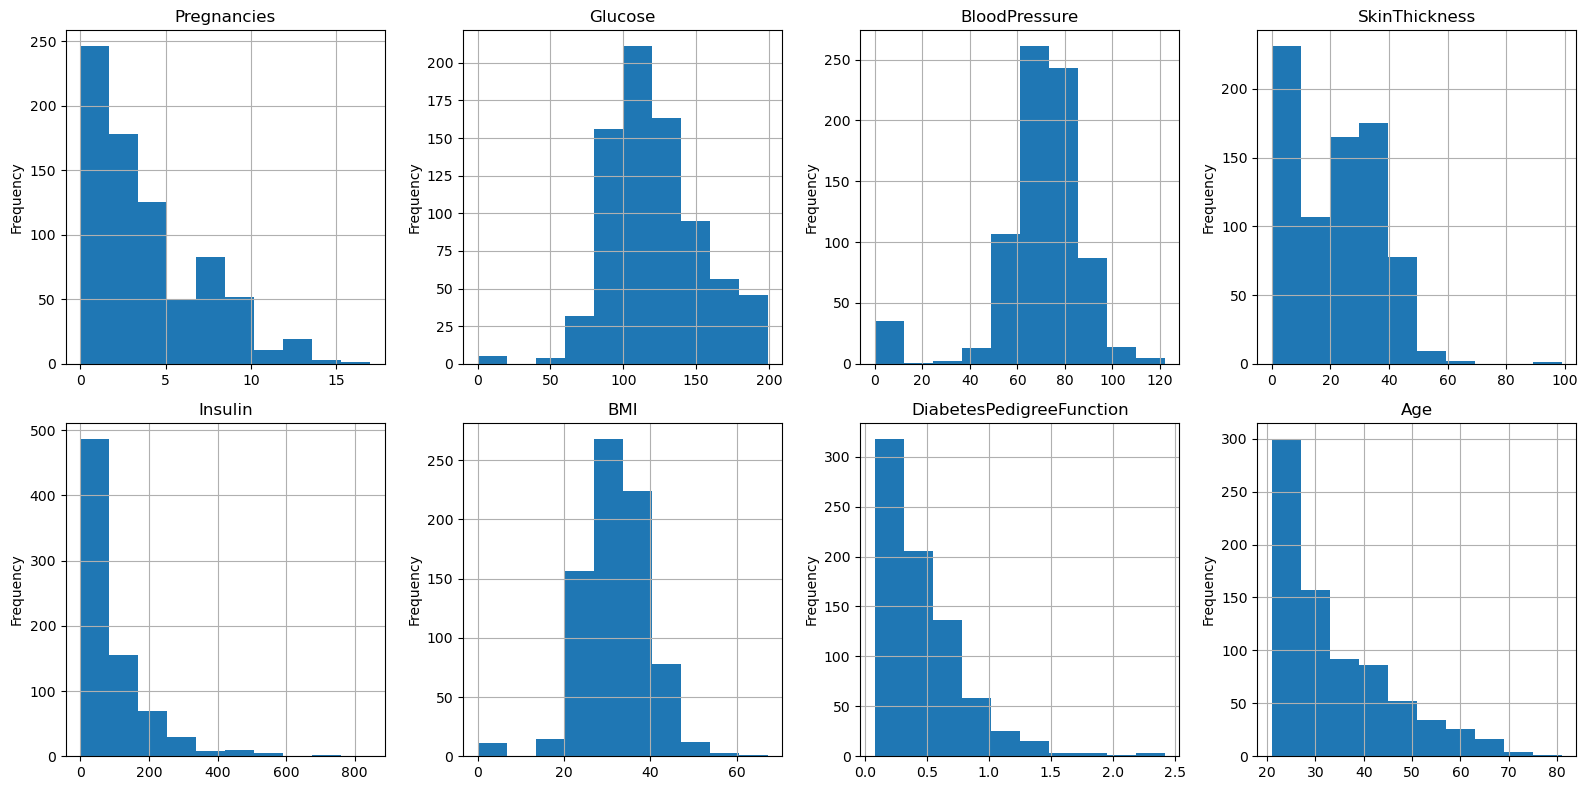

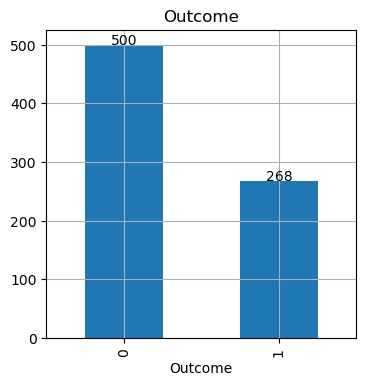

In [14]:
# preliminary data analysis
print("Preliminary Data Analysis:")
print(dataset.describe())

# visualization of the data distribution/variability

## Attributes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(dataset.columns[:-1]):  # exclude the "Outcome", only plot the 8 attributes
    ax = axes[i]
    dataset[column].plot(kind='hist', ax=ax, title=column, grid=True)  # plot histogram
    

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Outcomes
plt.figure(figsize=(4, 4))
outcome_counts = dataset["Outcome"].value_counts()
outcome_counts.plot(kind='bar', title="Outcome", grid=True)
for i, count in enumerate(outcome_counts):
    plt.text(i, count + 0.1, str(count), ha='center')
plt.show()

**Comments:**

1. From the describe( ) function we know that we have the data of 768 patients in total.

2. Whether a person has diabete is recorded in the column "Outcome". If a person has diabete then the outcome should be 1, otherwise 0.

3. There are 8 attributes we are going to use to predict whethere a person has diabete, they are: "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction" and "Age". The visualization of the their distribution or variability is shown in the first plot with 2 rows and 4 columns.

4. The distribution of the outcome is plotted in the second plot. From the bar chart we can see that among all the patients, 500 of them don't have diabetes while 268 of them have.

### Q2.1.2 Data processing

In [15]:
# data processing

## Check for missing data
missing_data = dataset.isnull().sum()
columns_with_missing_data = missing_data[missing_data > 0].index

if len(columns_with_missing_data) == 0:
    print("No missing data in the dataset.")
else:
    print("Columns with missing data:")
    print(columns_with_missing_data)

    # Display the count of missing values for each column
    print("\nCount of missing values for each column:")
    print(missing_data[missing_data > 0])


## Check for outliers
outliers = []

for column in dataset.columns[:-1]:  # Check for outliers in the first eight columns
    if (dataset[column] < 0).any():
        outliers.append(f"Negative values in column '{column}'")

if not all(dataset["Outcome"].isin([0, 1])):  # Check for outliers in the 'Outcome' column
    outliers.append("Invalid values in 'Outcome' column")

if not outliers:  # Display the outliers
    print("No outliers found.")
else:
    print("Outliers:")
    for outlier in outliers:
        print(outlier)


# data spliting
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

No missing data in the dataset.
No outliers found.


**Comments:**

1. In the data processing, we check whether there are some missing data or outliers. From the output we can see that there is no missing data in the dataset. In terms of the outliers checking, for the eight attributes, all data should be large or equal to 0, and the "Outcome" should be either 1 or 0. From the output we can see that there is no outliers in the dataset.

2. We then split the data according to the guide in the assignment with data size 0.33. For reproductbility, we set random state equal to 55.

### Q2.1.3 Implementation of uni-variate tree method for the classification problem

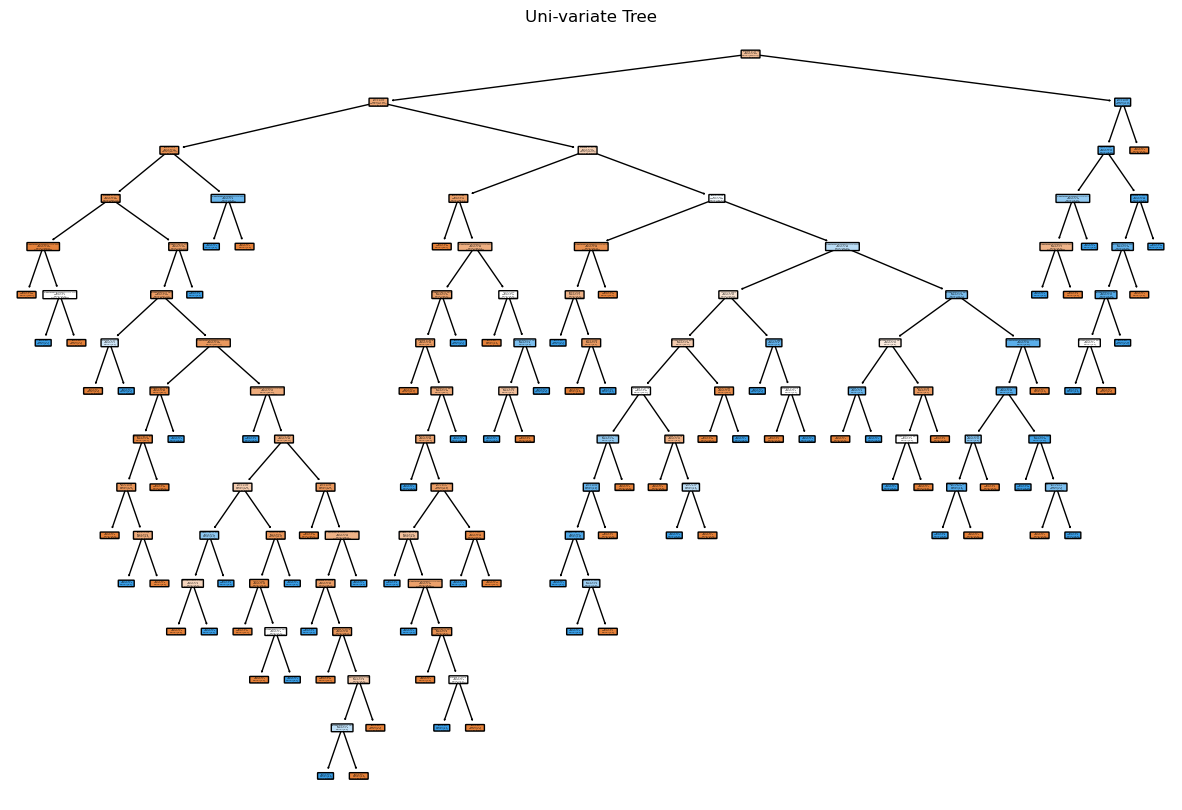

In [16]:
# uni-variate tree method
decision_tree_model = DecisionTreeClassifier(random_state=55)
decision_tree_model.fit(X_train, y_train)


# predictions
y_pred_dt = decision_tree_model.predict(X_test)

# plot the tree structure
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=names[:-1], class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title('Uni-variate Tree')
plt.show()

### Q2.1.4 Implementation of an ensemble model for the classification problem

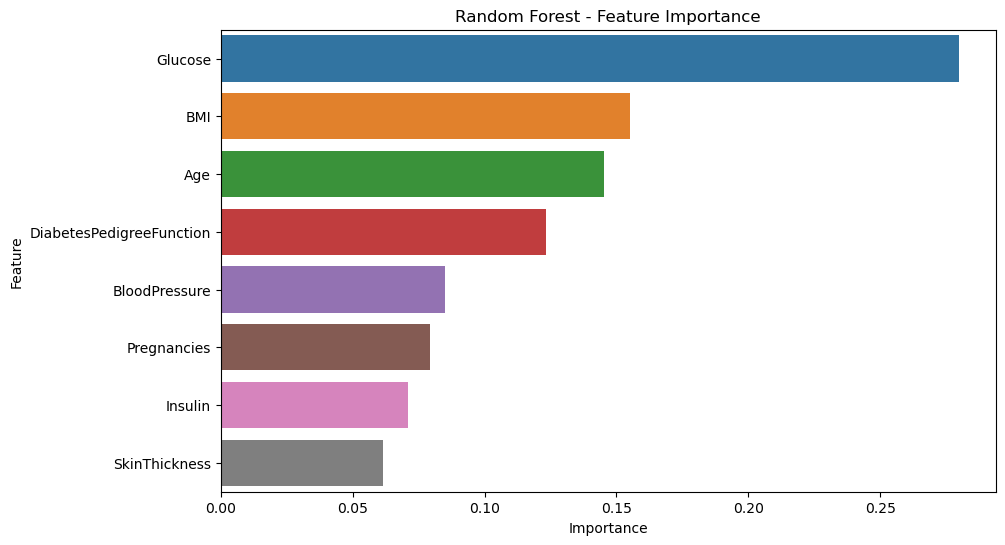

In [17]:
# ensemble model (random forest)
random_forest_model = RandomForestClassifier(random_state=55)
random_forest_model.fit(X_train, y_train)

# predictions
y_pred_rf = random_forest_model.predict(X_test)


# Get feature importances
feature_importances = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest - Feature Importance')
plt.show()

### Q2.1.5 Result visualizations & Comments on results


Univariate Tree Method (Decision Tree):

Decision Tree Model - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       152
           1       0.61      0.54      0.57       102

    accuracy                           0.68       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.67      0.68      0.67       254

Accuracy: 0.6771653543307087


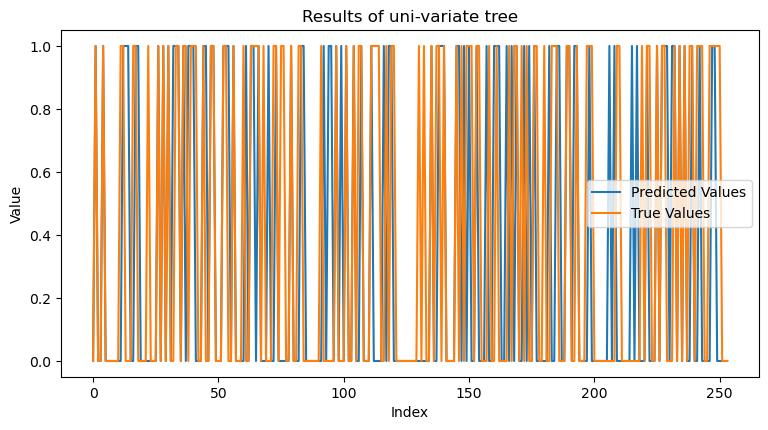


Ensemble Model (Random Forest):

Random Forest Model - Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       152
           1       0.71      0.54      0.61       102

    accuracy                           0.72       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.72      0.72      0.72       254

Accuracy: 0.7244094488188977


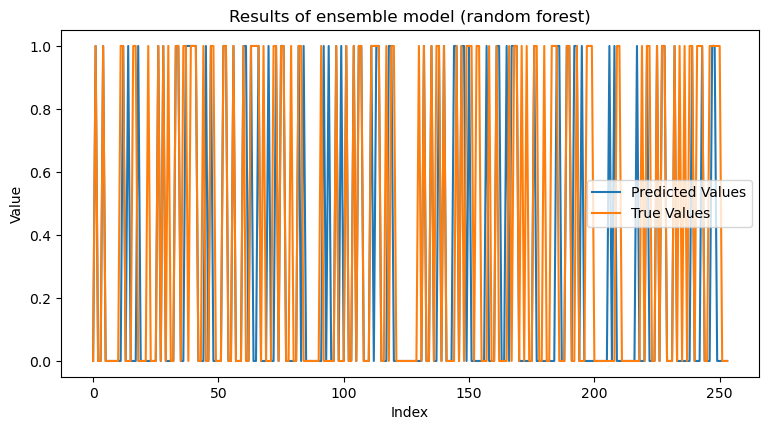

In [18]:
# result visualization

## uni-variate tree
print("\nUnivariate Tree Method (Decision Tree):")
print("\nDecision Tree Model - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

plt.figure(figsize=(9,4.5))
plt.plot(y_pred_dt,label="Predicted Values")
plt.plot(np.asarray(y_test), label="True Values")
plt.title("Results of uni-variate tree")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

## ensemble model (random forest)
print("\nEnsemble Model (Random Forest):")
print("\nRandom Forest Model - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(9,4.5))
plt.plot(y_pred_rf,label="Predicted Values")
plt.plot(np.asarray(y_test), label="True Values")
plt.title("Results of ensemble model (random forest)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

**Comments:**

1. Precision is the ratio of correctly predicted positive observations to the total predicted positives. It reflects the model's ability to avoid false positives. For people without or with diabetes, random forest has a higher precision (0.73 & 0.71) than uni-variate tree (0.71 & 0.61). Especially when predicting people with diabetes, random outperforms uni-variate tree interms of avoiding false positives.

2. Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.It measures the model's ability to capture all positive instances. In this case the recall of random forest (0.85 & 0.54) is higher or equal to the uni-variate tree (0.77 & 0.54) for both patients without or with diabetes.

3. F1-score combines precision and recall into a single metric.It is useful when there is an uneven class distribution or when both false positives and false negatives are critical. In this case the f1-score of random forest (0.79 & 0.61) is higher than the uni-variate tree (0.74 & 0.57) for both patients without or with diabetes.

4. In a classification problem, accuracy is the proportion of correctly predicted samples to the total number of samples. Specifically, it is the sum of the number of true positives and true negatives divided by the total number of samples. Here the accuracy of uni-variate tree is 0.68 while the random forest is 0.72.

5. Overall, the prediction error of random forest is smaller than the uni-variate tree, so I would prefer the random forest, i.e., the ensemble models.

**Personal Thinking:**

1. Although random forest perform well interms of accuracy than uni-variate tree, it is more complicated to interpret since it is a ensemble model compared to uni-variate tree.

2. From the structure plot shown in Q2.1.3 we can see that the uni-variate tree has a deep structure, which is a sign of overfitting. We can try to solve the overfitting by setting max depth of the tree. As a ensemble model, random forest alleviates overfitting.

3. Compared to uni-variate tree, random forest can provide insights into which features contribute more to the model's predictions, just as shown in the plot in Q2.1.4.

4. Due to the ensemble nature, ensemble models are likely to be computationally more intensive than  uni-variate tree.

### (Optional) a way to show how the tree splits the whole space

Yes. It is already shown in the plot in Q2.1.3. But for simplicity and readability, we set the **max depth** and then replot the tree structure here.

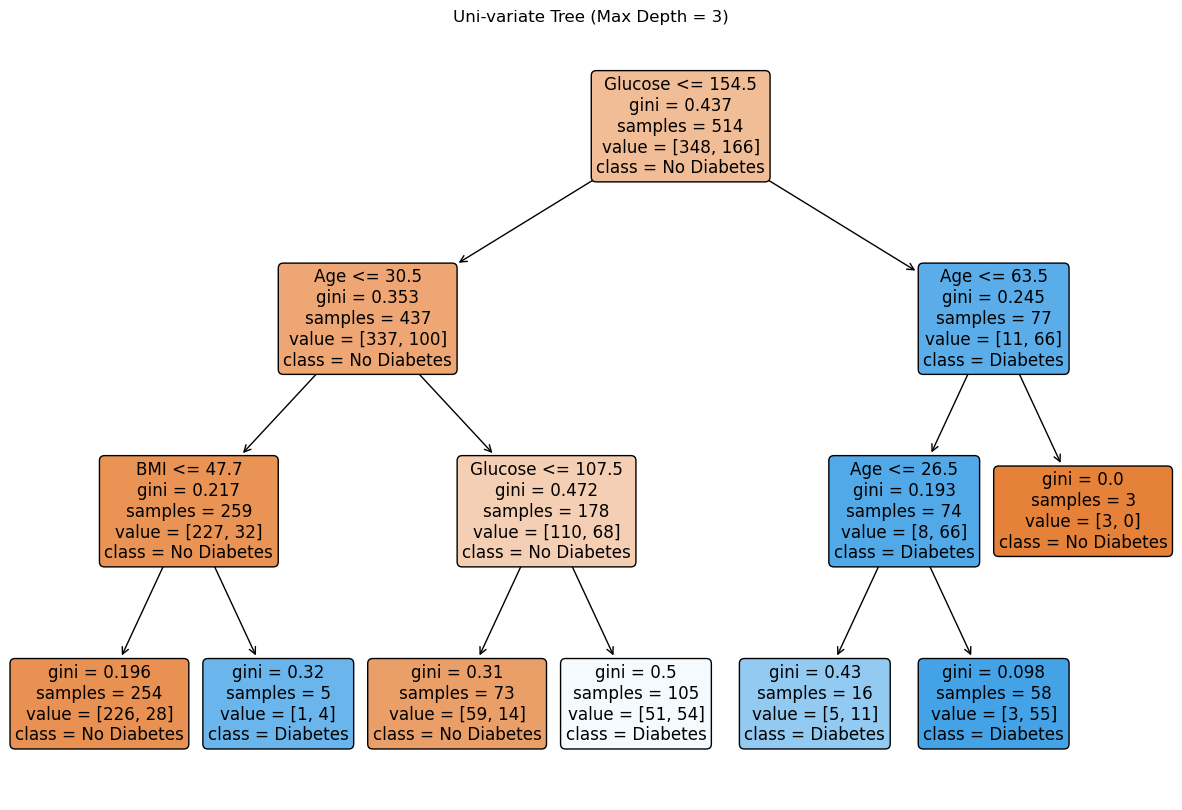

In [24]:
# Set the maximum depth
max_depth = 3

# Create the Decision Tree model with max_depth
decision_tree_model = DecisionTreeClassifier(random_state=55, max_depth=max_depth)
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Plot the tree structure
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=names[:-1], class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title(f'Uni-variate Tree (Max Depth = {max_depth})')
plt.show()